<h1 style="color:blue; text-align:center">Movie Recommendation System</h1>

In [1]:
import pandas as pd 
import numpy as np
import matplotlib.pyplot as plt

In [2]:
df = pd.read_csv(r'movie_metadata.csv')
df.head()

,color,director_name,num_critic_for_reviews,duration,director_facebook_likes,actor_3_facebook_likes,actor_2_name,actor_1_facebook_likes,gross,genres,...,num_user_for_reviews,language,country,content_rating,budget,title_year,actor_2_facebook_likes,imdb_score,aspect_ratio,movie_facebook_likes
0,Color,James Cameron,723.0,178.0,0.0,855.0,Joel David Moore,1000.0,760505847.0,Action|Adventure|Fantasy|Sci-Fi,...,3054.0,English,USA,PG-13,237000000.0,2009.0,936.0,7.9,1.78,33000
1,Color,Gore Verbinski,302.0,169.0,563.0,1000.0,Orlando Bloom,40000.0,309404152.0,Action|Adventure|Fantasy,...,1238.0,English,USA,PG-13,300000000.0,2007.0,5000.0,7.1,2.35,0
2,Color,Sam Mendes,602.0,148.0,0.0,161.0,Rory Kinnear,11000.0,200074175.0,Action|Adventure|Thriller,...,994.0,English,UK,PG-13,245000000.0,2015.0,393.0,6.8,2.35,85000
3,Color,Christopher Nolan,813.0,164.0,22000.0,23000.0,Christian Bale,27000.0,448130642.0,Action|Thriller,...,2701.0,English,USA,PG-13,250000000.0,2012.0,23000.0,8.5,2.35,164000
4,NaN,Doug Walker,NaN,NaN,131.0,NaN,Rob Walker,131.0,NaN,Documentary,...,NaN,NaN,NaN,NaN,NaN,NaN,12.0,7.1,NaN,0


In [3]:
df.shape

(5043, 28)

In [4]:
df.columns

Index(['color', 'director_name', 'num_critic_for_reviews', 'duration',
       'director_facebook_likes', 'actor_3_facebook_likes', 'actor_2_name',
       'actor_1_facebook_likes', 'gross', 'genres', 'actor_1_name',
       'movie_title', 'num_voted_users', 'cast_total_facebook_likes',
       'actor_3_name', 'facenumber_in_poster', 'plot_keywords',
       'movie_imdb_link', 'num_user_for_reviews', 'language', 'country',
       'content_rating', 'budget', 'title_year', 'actor_2_facebook_likes',
       'imdb_score', 'aspect_ratio', 'movie_facebook_likes'],
      dtype='object')

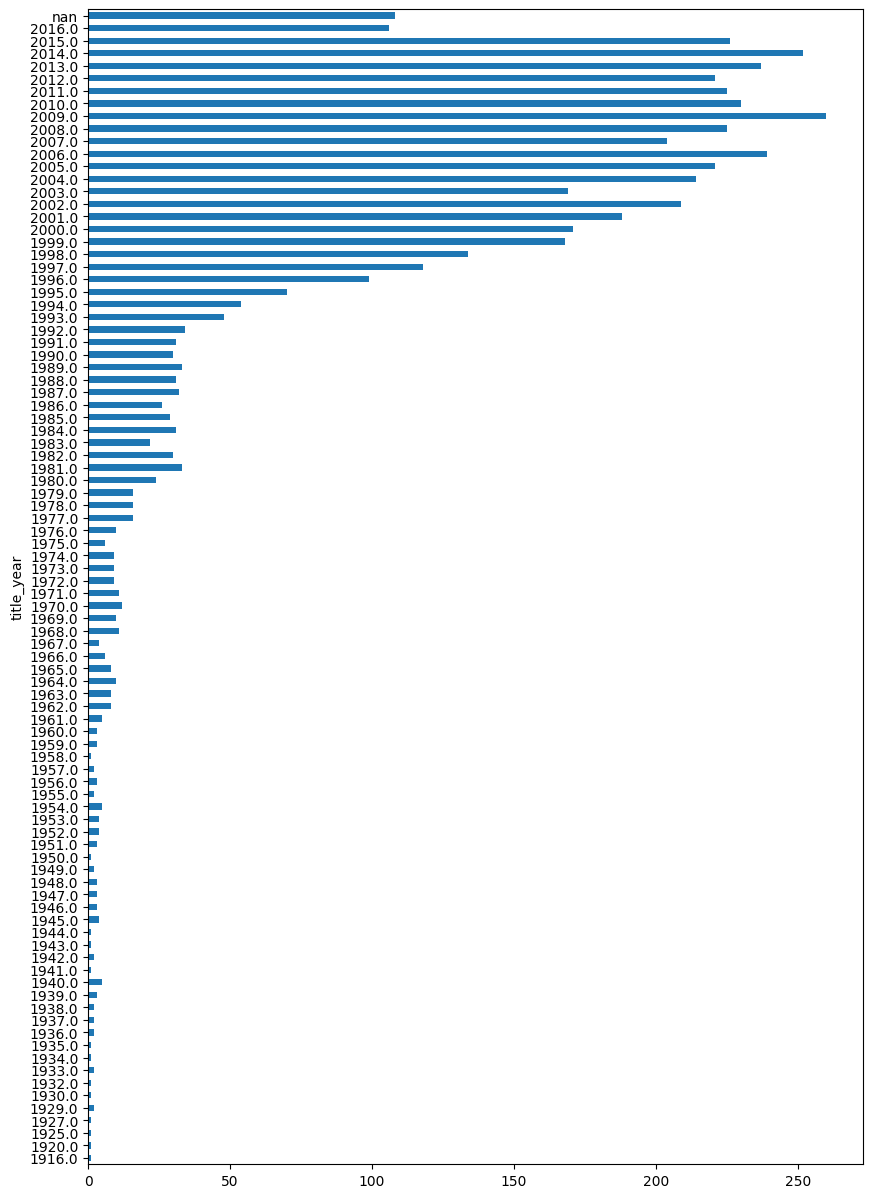

In [5]:
df['title_year'].value_counts(dropna=False).sort_index().plot(kind='barh',figsize=(10,15))
plt.show()

In [6]:
df.columns

Index(['color', 'director_name', 'num_critic_for_reviews', 'duration',
       'director_facebook_likes', 'actor_3_facebook_likes', 'actor_2_name',
       'actor_1_facebook_likes', 'gross', 'genres', 'actor_1_name',
       'movie_title', 'num_voted_users', 'cast_total_facebook_likes',
       'actor_3_name', 'facenumber_in_poster', 'plot_keywords',
       'movie_imdb_link', 'num_user_for_reviews', 'language', 'country',
       'content_rating', 'budget', 'title_year', 'actor_2_facebook_likes',
       'imdb_score', 'aspect_ratio', 'movie_facebook_likes'],
      dtype='object')

In [7]:
data = df[['director_name','actor_1_name','actor_2_name','actor_3_name','movie_title','genres']]
data

,director_name,actor_1_name,actor_2_name,actor_3_name,movie_title,genres
0,James Cameron,CCH Pounder,Joel David Moore,Wes Studi,Avatar,Action|Adventure|Fantasy|Sci-Fi
1,Gore Verbinski,Johnny Depp,Orlando Bloom,Jack Davenport,Pirates of the Caribbean: At World's End,Action|Adventure|Fantasy
2,Sam Mendes,Christoph Waltz,Rory Kinnear,Stephanie Sigman,Spectre,Action|Adventure|Thriller
3,Christopher Nolan,Tom Hardy,Christian Bale,Joseph Gordon-Levitt,The Dark Knight Rises,Action|Thriller
4,Doug Walker,Doug Walker,Rob Walker,NaN,Star Wars: Episode VII - The Force Awakens ...,Documentary
...,...,...,...,...,...,...
5038,Scott Smith,Eric Mabius,Daphne Zuniga,Crystal Lowe,Signed Sealed Delivered,Comedy|Drama
5039,NaN,Natalie Zea,Valorie Curry,Sam Underwood,The Following,Crime|Drama|Mystery|Thriller
5040,Benjamin Roberds,Eva Boehnke,Maxwell Moody,David Chandler,A Plague So Pleasant,Drama|Horror|Thriller
5041,Daniel Hsia,Alan Ruck,Daniel Henney,Eliza Coupe,Shanghai Calling,Comedy|Drama|Romance


In [8]:
data.isna().sum()

director_name    104
actor_1_name       7
actor_2_name      13
actor_3_name      23
movie_title        0
genres             0
dtype: int64

In [9]:
data.fillna("unknown",inplace=True)

C:\Users\ARMS\AppData\Local\Temp\ipykernel_8440\2504513852.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data.fillna("unknown",inplace=True)


In [10]:
data.isna().sum()

director_name    0
actor_1_name     0
actor_2_name     0
actor_3_name     0
movie_title      0
genres           0
dtype: int64

In [11]:
data.sample(3)

,director_name,actor_1_name,actor_2_name,actor_3_name,movie_title,genres
430,George A. Romero,Ted Danson,Hal Holbrook,Adrienne Barbeau,Creepshow,Comedy|Fantasy|Horror
4406,Noah Baumbach,William Baldwin,Elizabeth Meriwether,Owen Kline,The Squid and the Whale,Comedy|Drama
1473,Allen Hughes,Alona Tal,James Ransone,Michael Beach,Broken City,Crime|Drama|Thriller


In [12]:
data['genres']=data['genres'].str.replace('|',' ')
data.sample(2)

C:\Users\ARMS\AppData\Local\Temp\ipykernel_8440\1014645430.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data['genres']=data['genres'].str.replace('|',' ')


,director_name,actor_1_name,actor_2_name,actor_3_name,movie_title,genres
1678,Alister Grierson,Ioan Gruffudd,Rhys Wakefield,Richard Roxburgh,Sanctum,Adventure Drama Thriller
5024,Jason Trost,Sean Whalen,Jason Trost,Nick Principe,All Superheroes Must Die,Sci-Fi Thriller


In [13]:
data['movie_title']=data['movie_title'].str.lower()
data.sample(2)

C:\Users\ARMS\AppData\Local\Temp\ipykernel_8440\1800742364.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data['movie_title']=data['movie_title'].str.lower()


,director_name,actor_1_name,actor_2_name,actor_3_name,movie_title,genres
241,Kirk De Micco,Ryan Reynolds,Emma Stone,Nicolas Cage,the croods,Adventure Animation Comedy Family Fantasy
4621,Stefan C. Schaefer,Nicole Beharie,Marlene Forte,Reg E. Cathey,my last day without you,Comedy Drama Romance


In [14]:
data['movie_title'][0][:-1]

'avatar'

In [15]:
data['movie_title']=data['movie_title'].apply(lambda x: x[:-1])


C:\Users\ARMS\AppData\Local\Temp\ipykernel_8440\2163254527.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data['movie_title']=data['movie_title'].apply(lambda x: x[:-1])


In [16]:
data['movie_title'][9]

'harry potter and the half-blood prince'

In [17]:
#we will be using this information later on in the tfidvectorizor
data['comb'] = data['actor_1_name'] + ' ' + data['actor_2_name'] + ' '+ data['actor_3_name'] + ' '+ data['director_name'] +' ' + data['genres']
data

C:\Users\ARMS\AppData\Local\Temp\ipykernel_8440\3610551106.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data['comb'] = data['actor_1_name'] + ' ' + data['actor_2_name'] + ' '+ data['actor_3_name'] + ' '+ data['director_name'] +' ' + data['genres']


,director_name,actor_1_name,actor_2_name,actor_3_name,movie_title,genres,comb
0,James Cameron,CCH Pounder,Joel David Moore,Wes Studi,avatar,Action Adventure Fantasy Sci-Fi,CCH Pounder Joel David Moore Wes Studi James C...
1,Gore Verbinski,Johnny Depp,Orlando Bloom,Jack Davenport,pirates of the caribbean: at world's end,Action Adventure Fantasy,Johnny Depp Orlando Bloom Jack Davenport Gore ...
2,Sam Mendes,Christoph Waltz,Rory Kinnear,Stephanie Sigman,spectre,Action Adventure Thriller,Christoph Waltz Rory Kinnear Stephanie Sigman ...
3,Christopher Nolan,Tom Hardy,Christian Bale,Joseph Gordon-Levitt,the dark knight rises,Action Thriller,Tom Hardy Christian Bale Joseph Gordon-Levitt ...
4,Doug Walker,Doug Walker,Rob Walker,unknown,star wars: episode vii - the force awakens ...,Documentary,Doug Walker Rob Walker unknown Doug Walker Doc...
...,...,...,...,...,...,...,...
5038,Scott Smith,Eric Mabius,Daphne Zuniga,Crystal Lowe,signed sealed delivered,Comedy Drama,Eric Mabius Daphne Zuniga Crystal Lowe Scott S...
5039,unknown,Natalie Zea,Valorie Curry,Sam Underwood,the following,Crime Drama Mystery Thriller,Natalie Zea Valorie Curry Sam Underwood unknow...
5040,Benjamin Roberds,Eva Boehnke,Maxwell Moody,David Chandler,a plague so pleasant,Drama Horror Thriller,Eva Boehnke Maxwell Moody David Chandler Benja...
5041,Daniel Hsia,Alan Ruck,Daniel Henney,Eliza Coupe,shanghai calling,Comedy Drama Romance,Alan Ruck Daniel Henney Eliza Coupe Daniel Hsi...


In [18]:
data.to_csv('data1.csv',index=False)